Анализ вакансий от Алексея Манина

In [164]:
import pandas as pd
import datetime
import re
from dateutil.parser import parse

In [165]:
df = pd.read_csv(r'2_88__дата_маркетинг_10_156_150_164_163_157_134_name_description.csv', sep=';', encoding='utf-8')
df.head(2)

,id,date,name,company,salary,experience,schedule,schedule_dop,key,description
0,98812049,Вакансия опубликована 31 мая 2024 в Санкт-Пете...,Специалист по продвижению бренда,Торгово-производственная компания ООО ЭДЕЛЬВЕЙС,NaN,Требуемый опыт работы: 1–3 года,"Полная занятость, полный день",NaN,"['Аналитические исследования', 'Анализ рынка',...",Мы производим технологичную упаковку для проду...
1,98558876,Вакансия опубликована 31 мая 2024 в Санкт-Пете...,Маркетолог [IT],Secreate,NaN,Требуемый опыт работы: 1–3 года,"Полная занятость, полный день",NaN,"['CJM', 'QFD', 'RDB', 'NPS', 'Market Research']",Привет! Мы Secreate - ИТ-компания с подходом 3...


Преобразование даты __date__ в формат `datetime` в новую колонку __date_cr__

In [166]:
month_numbers = {'января': '01', 'февраля': '02', 'марта': '03', 'апреля': '04', 'мая': '05', 'июня': '06', 'июля': '07',
                 'августа': '08', 'сентября': '09', 'октября': '10', 'ноября': '11', 'декабря': '12'}

def month_replace(line):
    for k, v in month_numbers.items():
        line = line.replace(k, v)
    return line

df['date_cr'] = df['date'].apply(lambda x: re.findall('опубликована (.*?) в', x)[0].replace("\xa0", " ").strip())
df['date_cr'] = df['date_cr'].apply(lambda x: datetime.datetime.strptime(month_replace(x), '%d %m %Y'))
df['date_cr'] = df.date_cr.dt.date
# df

Преобразование ключевых навыков __key__ в словарь с навыками в тойже колонке

In [167]:
def str_to_lst(text):
    if text != '[]':
        text = text.strip("[]")  # Удаляем скобки "[" и "]" из строки

        # Разделяем строку по запятым и удаляем лишние пробелы
        list_of_strings = text.split(",")
        list_of_strings = [s.replace('\xa0', ' ').strip() for s in list_of_strings]
        return list_of_strings
    else:
        return []

df['key'] = df.key.apply(lambda x: str_to_lst(x))
df.head(2)

,id,date,name,company,salary,experience,schedule,schedule_dop,key,description,date_cr
0,98812049,Вакансия опубликована 31 мая 2024 в Санкт-Пете...,Специалист по продвижению бренда,Торгово-производственная компания ООО ЭДЕЛЬВЕЙС,NaN,Требуемый опыт работы: 1–3 года,"Полная занятость, полный день",NaN,"['Аналитические исследования', 'Анализ рынка',...",Мы производим технологичную упаковку для проду...,2024-05-31
1,98558876,Вакансия опубликована 31 мая 2024 в Санкт-Пете...,Маркетолог [IT],Secreate,NaN,Требуемый опыт работы: 1–3 года,"Полная занятость, полный день",NaN,"['CJM', 'QFD', 'RDB', 'NPS', 'Market Research']",Привет! Мы Secreate - ИТ-компания с подходом 3...,2024-05-31


Исследование ключевых навыков

In [168]:
# Создаем пустой словарь
key_dic = {}

# Перебираем списки из колонки key
for key_lst in df.key:
    # Перебираем элементы списка
    for item in key_lst:
        # Если элемент уже есть в словаре, увеличиваем его значение на 1
        if item in key_dic:
            key_dic[item] += 1
        # Если элемента нет в словаре, добавляем его как ключ со значением 1
        else:
            key_dic[item] = 1

# df_key = pd.DataFrame(columns=['count'])
# df_key = pd.DataFrame.from_dict(key_dic)
df_key = pd.DataFrame([key_dic]).T.sort_values(by=0, ascending=False).reset_index().rename(columns={0: 'count', 'index': 'key_skills'})
# df_key.head(30)

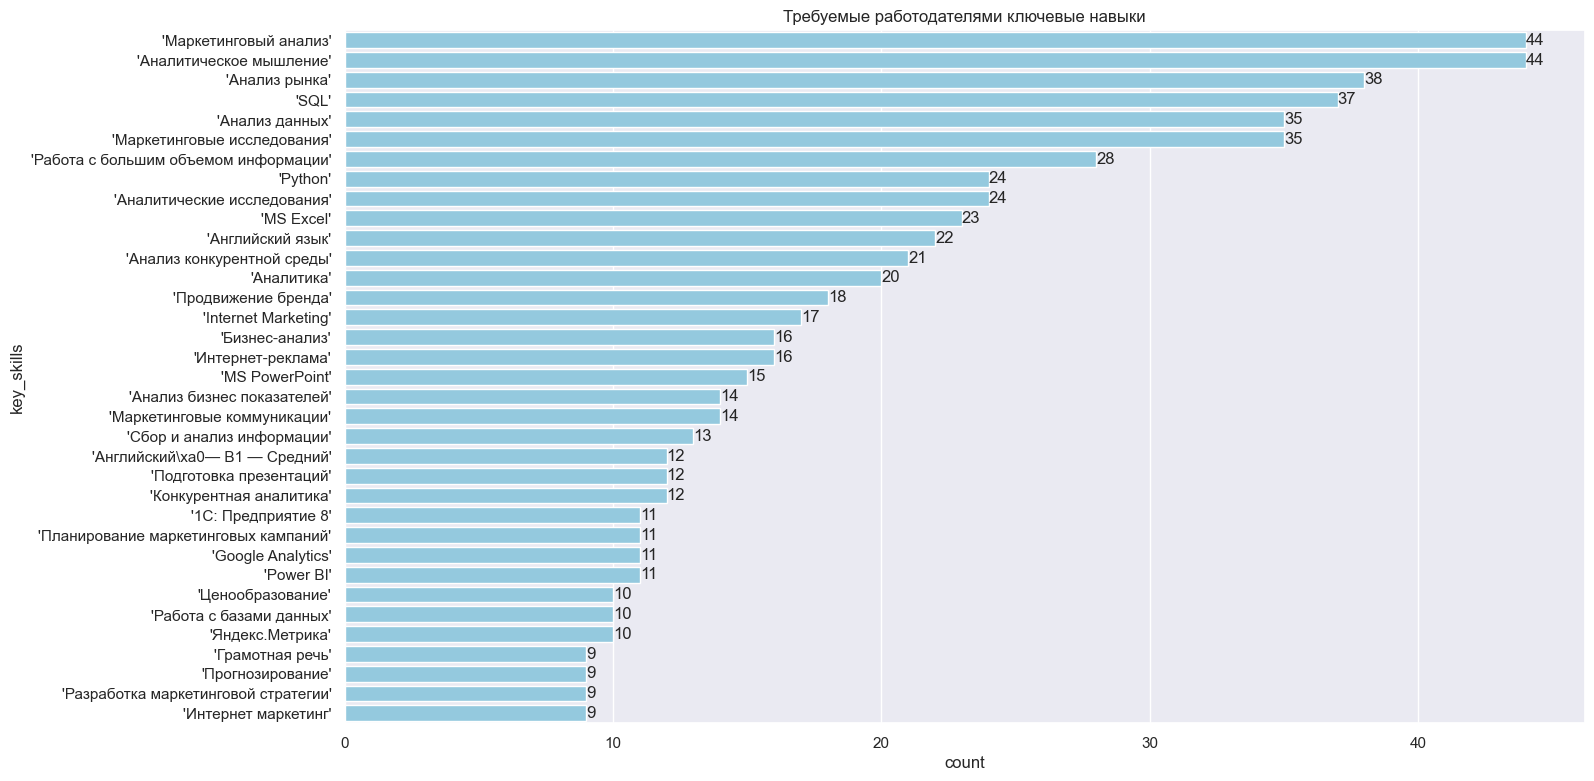

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(rc={'figure.figsize':(16,9)})

# Создаем горизонтальный график столбцов с помощью Seaborn
sns.barplot(x='count', y='key_skills', data=df_key.head(35), color='skyblue')

# Добавляем значения на столбцах
for index, value in enumerate(df_key['count'].head(35)):
    plt.text(value, index, str(value), ha='left', va='center')

# Настройка заголовка графика
plt.title('Требуемые работодателями ключевые навыки')

# Отображение графика
plt.show()

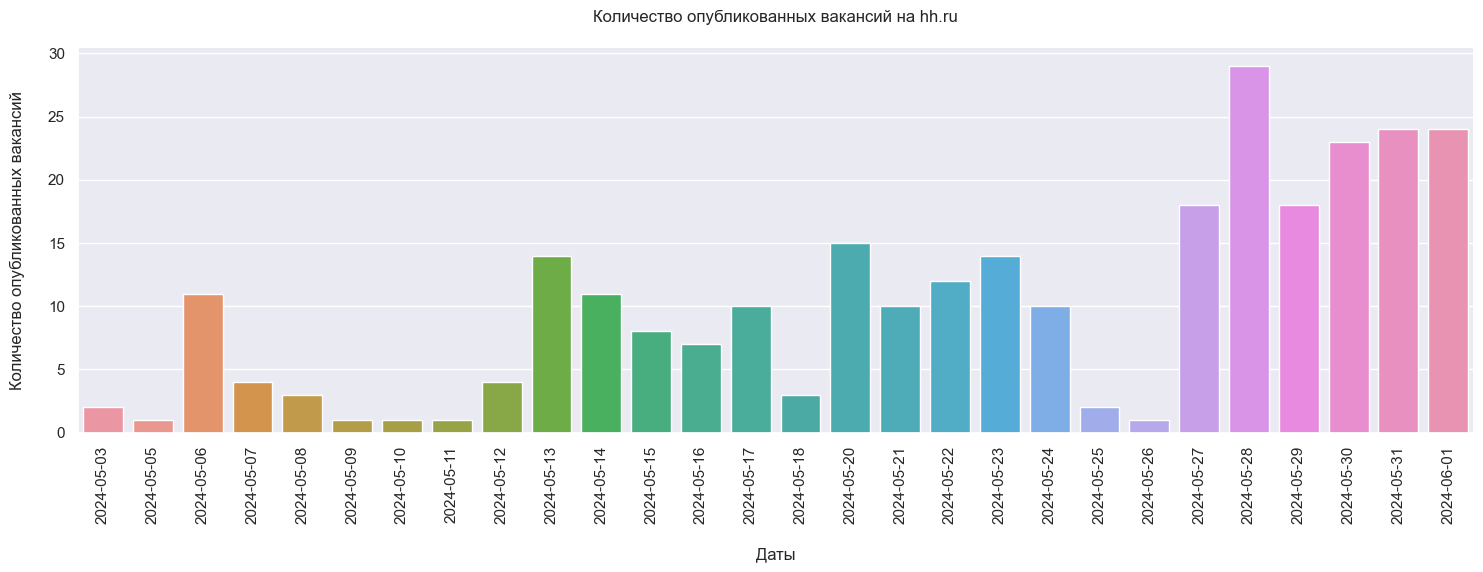

In [170]:
# df['Year'] = df['Year'].astype('int')
df_1 = df.groupby(['date_cr'], as_index=False) \
         .agg({'id': 'count'}) \
         .rename(columns={'id': 'count_create'}) \
         .sort_values(['date_cr'], ascending=True)

sns.set_theme(rc={'figure.figsize':(18,5)})
ax = sns.barplot(data=df_1, y='count_create', x='date_cr')
ax.set_xticklabels(df_1.date_cr, rotation=90)
ax.set_title('Количество опубликованных вакансий на hh.ru\n')
ax.set_ylabel('Количество опубликованных вакансий\n')
ax.set_xlabel('\nДаты')
sns.despine()